# Research Notebook #2
## Belen Llaguno
## Date: January 28 - February 17

# 1: Experience
## Describe at least one research activity you worked on this week.
- Read the paper "COLOSSUS: A PYTHON TOOLKIT FOR COSMOLOGY, LARGE-SCALE STRUCTURE, AND DARK MATTER HALOS"
- Fixed the recreation of figure 6 from the paper read
- Read the paper "AMICO galaxy clusters in KiDS-DR3: Measuring the splashback
radius from weak gravitational lensing"
- Read the presentation "The splashback radius as a physical halo boundary"
- Recreated fig. 9 from the Giocoli paper


## Motivation:

The study of galaxy clusters and their associated splashback radii provides crucial insights into the large-scale structure of the universe and the dynamics of dark matter halos. Theoretical models, such as those proposed by More et al. (2015) and Diemer (2020), offer predictions for the splashback radius that can be tested against observational data. By integrating observational measurements from different surveys, we seek to assess the consistency and accuracy of the theoretical predictions across different redshifts, cluster selection methods, and measurement techniques.

# 2: What? (What happened?)
## Describe what happened during your activities for the week.

I read the papers to familiarize with the data nd the models. Then I attempted recreating figure 6 in the COLOSSUS paper again. I made a change suggested by another student, and the plot now matched the figure exactly. It was not an error in the code itself, or the version of COLOSSUS used, it was setting Cosmology to a different data set. Then I tried recreating figure 9 in the Giocoli paper. First I did not include errors,  and the predictions by More(2015), Diemer (2020), and the custom model in the paper all match the figure. However when trying to include the errors in the coefficients in the model, my plot seems to have larger errors. It could be due to the way I propagated the error (general error propagation formula).

Code without errors in coefficients:


In [1]:
pip install colossus

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.2/198.2 kB 3.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from colossus.cosmology import cosmology
from colossus.halo import splashback

# Display the available splashback models
for model in splashback.models:
    print(model)


# Function to calculate the splashback radius ratio based on a custom model from Giocoli et al. 2024 (AMICO galaxy clusters)
def Giocoli(nu_values):
    # Parameters based on Giocoli
    A = 0.95
    B = -0.31
    result = []

    # Calculate the value for each nu from the input array
    for nu in nu_values:
        ratio = A * (1 + B * np.exp(-nu / 2.44))
        result.append(ratio)

    return result


def plot_splashback():

    # Set cosmology to Planck 2018 data
    cosmology.setCosmology('planck18')

    # Redshift value for the calculation (based on Giocoli)
    redshift = 0.35

    # Range of nu values to evaluate the models
    nu_values = np.arange(0.5, 4.6, 0.1)

    # Initialize plot figure
    plt.figure()

    # Label the axes
    plt.xlabel(r'nu200m')
    plt.ylabel(r'Rsp/R200m')

    # Set the axis limits for x and y
    plt.xlim(1.5, 4.5)
    plt.ylim(0.4, 2.25)

    # Compute splashback radius using the "more15" model
    splashback_result, valid_mask = splashback.splashbackModel('RspR200m', nu200m=nu_values, z=redshift,
                                                              model="more15", rspdef='sp-apr-p75', statistic='median')
    plt.plot(nu_values[valid_mask], splashback_result, color='deeppink', label="more15".replace('_', '\\_'))

    # Compute splashback radius using the "diemer20" model
    splashback_result, valid_mask = splashback.splashbackModel('RspR200m', nu200m=nu_values, z=redshift,
                                                              model="diemer20", rspdef='sp-apr-p75', statistic='median')
    plt.plot(nu_values[valid_mask], splashback_result, color='purple', label="diemer20".replace('_', '\\_'))

    # Compute and plot splashback radius using the custom model from Giocoli et al. 2024 (Violet)
    ratios = Giocoli(nu_values)

    # Plot with asymmetric error bars
    plt.plot(nu_values, ratios, color='pink', label="Giocoli et al. 2024 (custom model)")

    # Display legend to differentiate the models
    plt.legend()

    # Show the plot on screen
    plt.show()


plot_splashback()


Code with errors in coefficients propagated into the calculation of Rsp/R200m:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from colossus.cosmology import cosmology
from colossus.halo import splashback

# Display the available splashback models
for model in splashback.models:
    print(model)


# Function to calculate the splashback radius ratio based on a custom model from Giocoli et al. 2024 (AMICO galaxy clusters)
def Giocoli(nu_values):
    # Parameters based on Giocoli
    A = 0.95
    A_err = [-0.34 , 0.32]
    B = -0.31
    B_err = [-0.73 , 1.5]
    result = []
    result_err = []

    # Calculate the value for each nu from the input array
    for nu in nu_values:
        ratio = A * (1 + B * np.exp(-nu / 2.44))
        ratio_err = [np.exp(-nu / 2.44) * np.sqrt((B * A_err[0])**2 + (A * B_err[0])**2) , np.exp(-nu / 2.44) * np.sqrt((B * A_err[1])**2 + (A * B_err[1])**2)]
        result.append(ratio)
        result_err.append(ratio_err)

    return result, result_err


def plot_splashback():

    # Set cosmology to Planck 2018 data
    cosmology.setCosmology('planck18')

    # Redshift value for the calculation (based on Giocoli)
    redshift = 0.35

    # Range of nu values to evaluate the models
    nu_values = np.arange(0.5, 4.6, 0.1)

    # Initialize plot figure
    plt.figure()

    # Label the axes
    plt.xlabel(r'nu200m')
    plt.ylabel(r'Rsp/R200m')

    # Set the axis limits for x and y
    plt.xlim(1.5, 4.5)
    plt.ylim(0.4, 2.25)

    # Compute splashback radius using the "more15" model (Pink)
    splashback_result, valid_mask = splashback.splashbackModel('RspR200m', nu200m=nu_values, z=redshift,
                                                              model="more15", rspdef='sp-apr-p75', statistic='median')
    plt.plot(nu_values[valid_mask], splashback_result, color='deeppink', label="more15".replace('_', '\\_'))

    # Compute splashback radius using the "diemer20" model (Magenta)
    splashback_result, valid_mask = splashback.splashbackModel('RspR200m', nu200m=nu_values, z=redshift,
                                                              model="diemer20", rspdef='sp-apr-p75', statistic='median')
    plt.plot(nu_values[valid_mask], splashback_result, color='purple', label="diemer20".replace('_', '\\_'))

    # Compute and plot splashback radius using the custom model from Giocoli et al. 2024 (Violet)
    ratios, errors = Giocoli(nu_values)

    # Convert list of [lower, upper] errors into two separate lists
    lower_err = [err[0] for err in errors]
    upper_err = [err[1] for err in errors]

    # Plot with asymmetric error bars
    plt.errorbar(nu_values, ratios, yerr=[lower_err, upper_err], fmt='o', color='pink',
                 capsize=5, label="Giocoli et al. 2024 (custom model)")

    # Display legend to differentiate the models
    plt.legend()

    # Show the plot on screen
    plt.show()


plot_splashback()

# 3: So what? (What does it mean?)
## Describe your results

Fixed recreation of fig 6 from COLOSSUS:

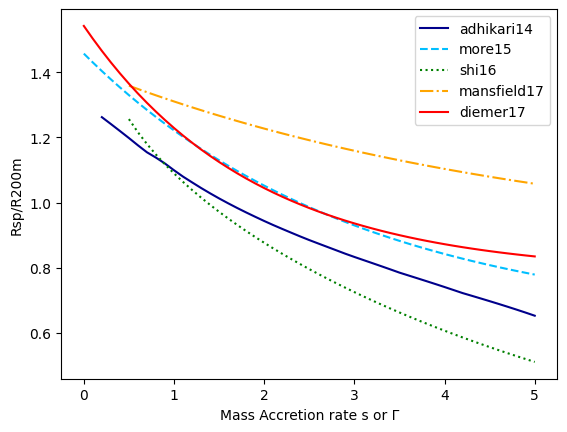




Original figure 6 in COLOSSUS:

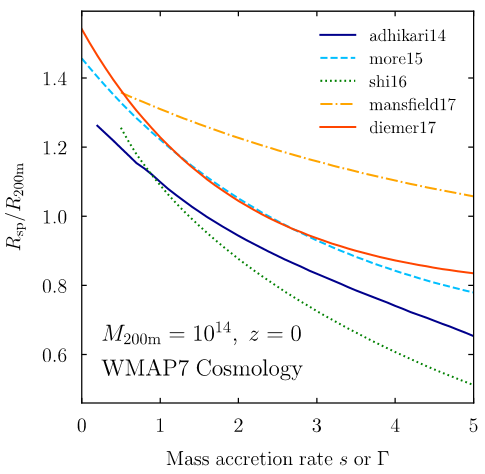



Recreation of figure 9 in Giocoli (no errors considered):

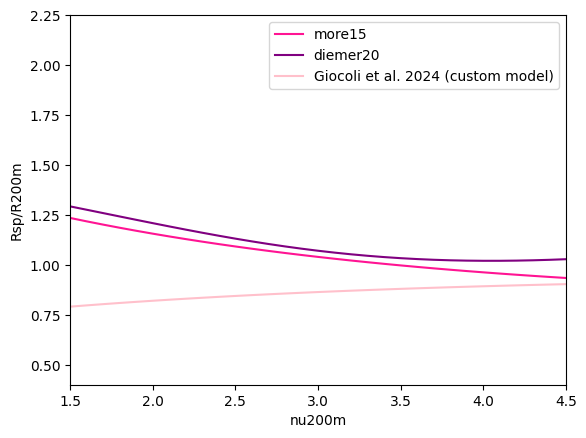



Recreation of figure 9 in Giocoli (errors considered):

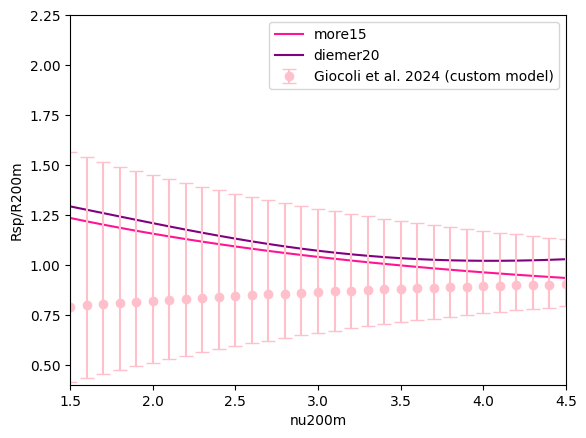


Original figure 9 in Giocoli:

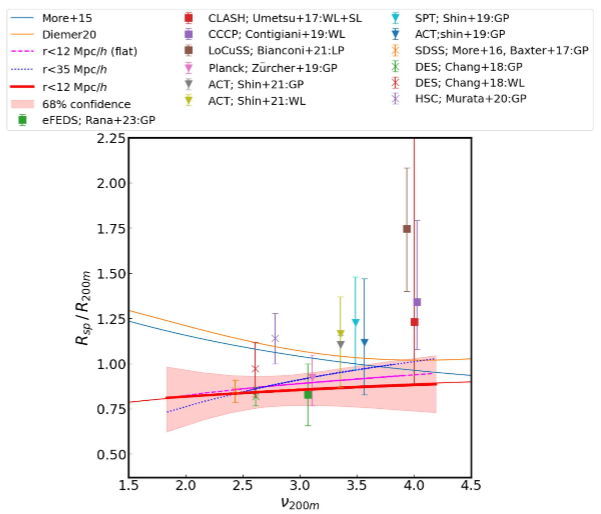

# 4. Now what? (What's next?)
## Plan for the next week

- Fix the error propagation to match the figure on the paper.
- Add plots of the observational data that I can access.
- Discuss discrepancies between theoretical models and observations.
- Implement new dark matter models (e.g., fuzzy and self-interacting dark matter) in COLOSSUS.
- Reproduce the semi-analytical model from Adhikari et al. 2014 using equations (1)-(3).
- Compare computed splashback radius values with those from COLOSSUS.
- Generalize the Adhikari et al. 2024 model for various dark matter scenarios.

# 5. Bibliography

[1]  B. Diemer, “COLOSSUS: A Python Toolkit for Cosmology, Large-scale Structure, and Dark Matter Halos,” The Astrophysical Journal Supplement Series 239(2), 35 (2018).

[2] Giocoli C, et al. AMICO galaxy clusters in KiDS-DR3: Measuring the splashback radius from weak gravitational lensing. Astronomy & Astrophysics (2024).

[3] B. Diemer, The splashback radius
as a physical halo boundary (2019).


# Grading

| Category       | Points      |
| ------------- |:------------:|
| Formatting    |       2 / 2       |
| Experience    |       2 / 2       |
| What?         |       2 / 2       |
| So what?      |       2 / 4       |
| Now what?     |       4 / 4       |
| Bibliography  |       3 / 3       |
| Style         |       3 / 3       |
| Total         |       18 / 20     |

## Additional comments
You can go a little bit more into detail about your results in 3). What do these plots mean and what are the errorbars? \
Aside from that, good work!